In [6]:
import pandas as pd
import numpy as np
x=pd.read_csv("hongos_datos.csv")
y=pd.read_csv("hongos_target.csv")


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train.values.ravel())

print("Mejores hiperparámetros:", grid.best_params_)
print("Mejor score de validación:", grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores hiperparámetros: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mejor score de validación: 1.0


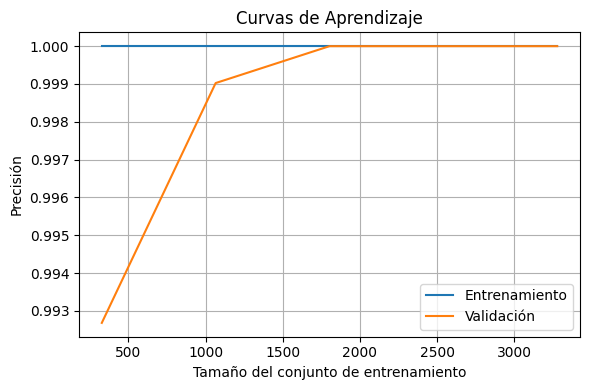

In [9]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    grid.best_estimator_, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_scores_mean, label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, label="Validación")
plt.title("Curvas de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("modelo1_learning_curve.png")
plt.show()

Matriz de confusión:
 [[596   0]
 [  0 429]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       596
           1       1.00      1.00      1.00       429

    accuracy                           1.00      1025
   macro avg       1.00      1.00      1.00      1025
weighted avg       1.00      1.00      1.00      1025


Precisión total: 1.0


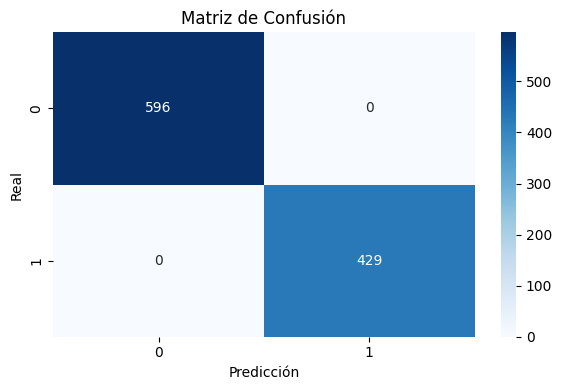

In [10]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
y_pred = grid.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", cm)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nPrecisión total:", accuracy_score(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.savefig("modelo1_confusion_matrix.png")
plt.show()